# Regressão 01 - tarefa 03 - transformações em X e Y

In [206]:
# Importanto as bibliotecas e o data frame:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Carregue os pacotes necessários e a base de gorjetas.

## I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [207]:
# 1. Definindo a matriz de design para sex, smoker, time, e net_bill:

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [208]:
# 2. Removendo as variáveis não significantes


modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.64e-20
Time:                        23:37:21   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
# A variável sexo parece pouco significativa para o modelo; retirando e refazendo: 

y, X = patsy.dmatrices('tip ~ smoker + time + net_bill + 1', tips)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.35
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.79e-21
Time:                        23:37:21   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             758.3
Df Residuals:                     240   BIC:                             772.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1978      0.221      5.412      0.000       0.762       1.634
smoker[T.No]       0.1405      0.150      0.934      0.351      -0.156       0.437
time[T.Dinner]     0.0591      0.165      0.358      0.721      -0.266       0.384
net_bill           0.0995      0.009     10.756      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.578   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.011
Skew:                           0.801   Prob(JB):                     4.63e-15
Kurtosis:                       4.982   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
# Retirando também a variável time:

y, X = patsy.dmatrices('tip ~ smoker + net_bill + 1', tips)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           4.56e-22
Time:                        23:37:22   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
# 3. Gráfico de resíduos em função de net_bill:

tips['res'] = modelo.resid

tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,res
201,12.74,2.01,Female,Yes,Thur,Lunch,2,0.187325,10.73,-0.296090
193,15.48,2.02,Male,Yes,Thur,Lunch,2,0.150074,13.46,-0.559423
95,40.17,4.73,Male,Yes,Fri,Dinner,4,0.133465,35.44,-0.050106
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,-1.301303
113,23.95,2.55,Male,No,Sun,Dinner,2,0.119159,21.40,-0.962847


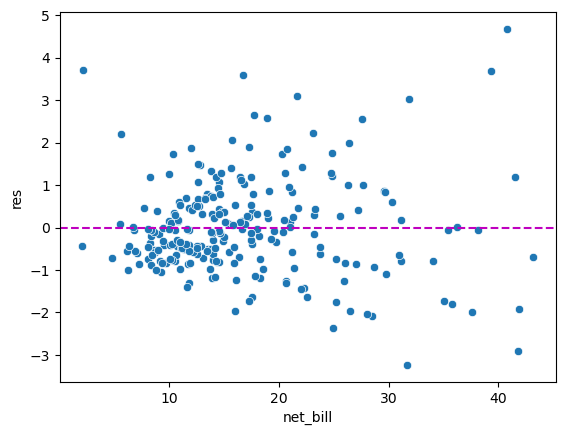

In [212]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='m', linestyle='--')

In [213]:
# 4.1 Transformando net_bill em log:

y, X = patsy.dmatrices('tip ~ smoker + np.log(net_bill) + 1', tips)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           5.38e-19
Time:                        23:37:22   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

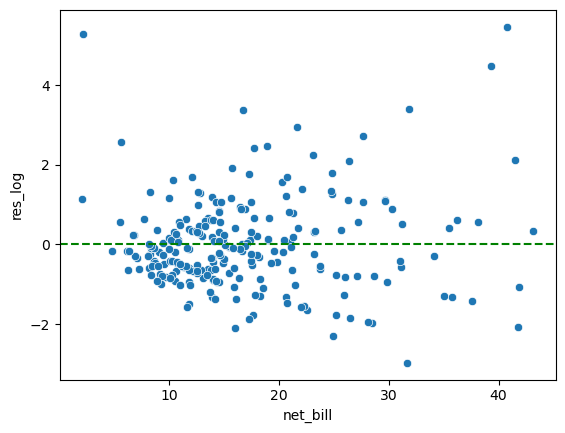

In [214]:
tips['res_log'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='g', linestyle='--')

In [215]:
# 4.2. Transformando em polinômio

y, X = patsy.dmatrices('tip ~ smoker + (net_bill + np.power(net_bill,2)) + 1', tips)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     40.55
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.11e-21
Time:                        23:37:22   Log-Likelihood:                -374.93
No. Observations:                 244   AIC:                             757.9
Df Residuals:                     240   BIC:                             771.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0129      0.361      2.804      0.005       0.301       1.724
smoker[T.No]              0.1263      0.151      0.836      0.404      -0.171       0.424
net_bill                  0.1262      0.037      3.408      0.001       0.053       0.199
np.power(net_bill, 2)    -0.0006      0.001     -0.727      0.468      -0.002       0.001
==============================================================================
Omnibus:                       42.091   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.282
Skew:                           0.872   Prob(JB):                     8.23e-19
Kurtosis:                       5.270   Cond. No.                     2.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

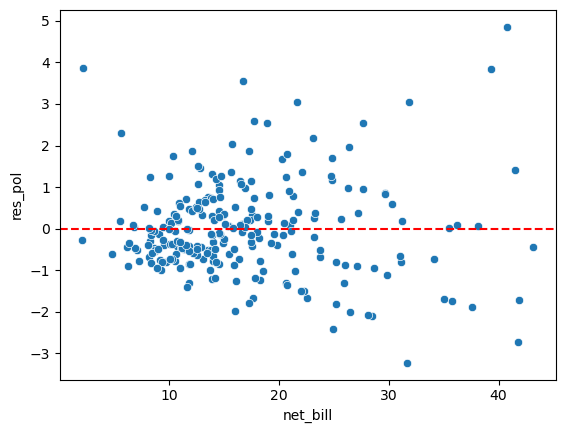

In [216]:
# reg = smf.ols('tip ~ smoker + net_bill + 1', data = tips).fit()
tips['res_pol'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res_pol', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [217]:
# Os gráficos de resíduos ficaram bastante parecidos, mas comparando os valores de R² o melhor modelo parece ser o último,
# usando uma transformação em polinômio de segundo grau.

## II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [218]:
# 1. Definindo a matriz de design para sex, smoker, time, e net_bill:

y, X = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill + 1', tips)

In [219]:
# Removendo variáveis não significantes

modelo2 = sm.OLS(y,X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.85e-05
Time:                        23:37:22   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3216      0.033      9.698      0.000       0.256       0.387
sex[T.Female]     -0.0069      0.021     -0.321      0.749      -0.049       0.035
smoker[T.No]      -0.0351      0.021     -1.700      0.090      -0.076       0.006
time[T.Dinner]     0.0221      0.023      0.961      0.337      -0.023       0.067
net_bill          -0.0066      0.001     -5.191      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      461.972   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218184.236
Skew:                          10.789   Prob(JB):                         0.00
Kurtosis:                     147.897   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
# removendo sex 

y, X = patsy.dmatrices('tip_pct ~ net_bill + smoker + time + 1', tips)
modelo2 = sm.OLS(y,X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     9.544
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           5.60e-06
Time:                        23:37:22   Log-Likelihood:                 110.07
No. Observations:                 244   AIC:                            -212.1
Df Residuals:                     240   BIC:                            -198.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3173      0.030     10.474      0.000       0.258       0.377
smoker[T.No]      -0.0350      0.021     -1.698      0.091      -0.076       0.006
time[T.Dinner]     0.0235      0.023      1.040      0.299      -0.021       0.068
net_bill          -0.0066      0.001     -5.197      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      462.732   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220135.338
Skew:                          10.824   Prob(JB):                         0.00
Kurtosis:                     148.547   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

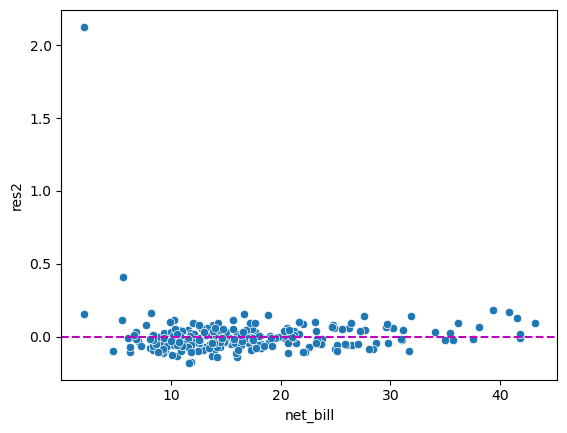

In [221]:
# Gráfico de resíduos

tips['res2'] = modelo2.resid

sns.scatterplot(x = 'net_bill', y = 'res2', data = tips)
plt.axhline(y=0, color='m', linestyle='--')

In [222]:
# Transformando em log

y, X = patsy.dmatrices('tip_pct ~ time + smoker + np.log(net_bill) + 1', tips)

modelo3 = sm.OLS(y,X).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     22.32
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           8.78e-13
Time:                        23:37:22   Log-Likelihood:                 126.35
No. Observations:                 244   AIC:                            -244.7
Df Residuals:                     240   BIC:                            -230.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6313      0.056     11.306      0.000       0.521       0.741
time[T.Dinner]       0.0319      0.021      1.510      0.132      -0.010       0.073
smoker[T.No]        -0.0304      0.019     -1.586      0.114      -0.068       0.007
np.log(net_bill)    -0.1598      0.020     -8.070      0.000      -0.199      -0.121
==============================================================================
Omnibus:                      433.178   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157410.912
Skew:                           9.519   Prob(JB):                         0.00
Kurtosis:                     125.966   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

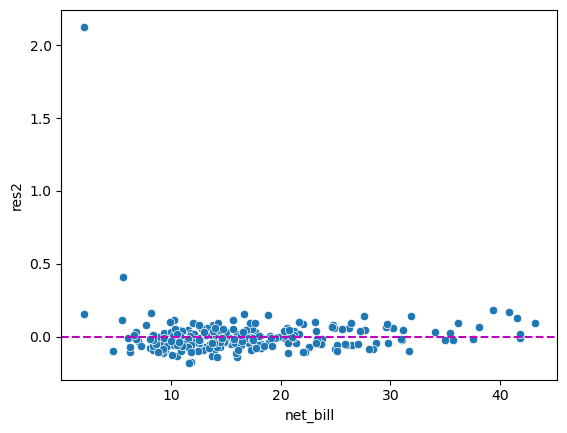

In [223]:
tips['res3'] = modelo3.resid

sns.scatterplot(x = 'net_bill', y = 'res2', data = tips)
plt.axhline(y=0, color='m', linestyle='--')

In [224]:
# 4.2. Transformando em polinômio

y, X = patsy.dmatrices('tip_pct ~ time + smoker + (net_bill + np.power(net_bill,2)) + 1', tips)

modelo4 = sm.OLS(y,X).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     12.24
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           4.55e-09
Time:                        23:37:23   Log-Likelihood:                 119.06
No. Observations:                 244   AIC:                            -228.1
Df Residuals:                     239   BIC:                            -210.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4845      0.049      9.919      0.000       0.388       0.581
time[T.Dinner]            0.0294      0.022      1.345      0.180      -0.014       0.072
smoker[T.No]             -0.0253      0.020     -1.264      0.207      -0.065       0.014
net_bill                 -0.0270      0.005     -5.475      0.000      -0.037      -0.017
np.power(net_bill, 2)     0.0005      0.000      4.274      0.000       0.000       0.001
==============================================================================
Omnibus:                      442.507   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           176069.345
Skew:                           9.914   Prob(JB):                         0.00
Kurtosis:                     133.097   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

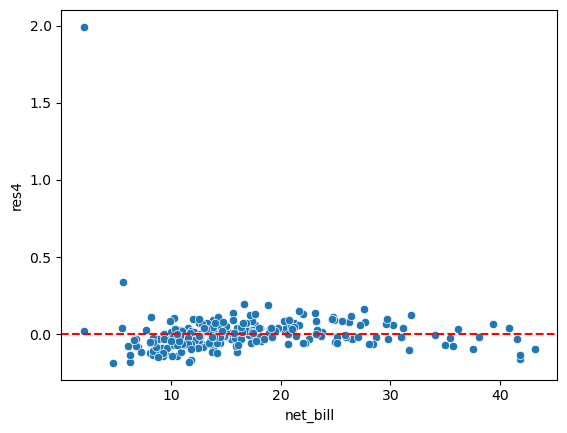

In [225]:
tips['res4'] = modelo4.resid

sns.scatterplot(x = 'net_bill', y = 'res4', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [226]:
# Calculando R² (estou usando tip_pct; o exercício está escrito de uma forma confusa, 
# no título diz pra usar 'tip_pct' e o enunciado está exatamente igual ao exercício anterior)

tips['pred4_pct'] = np.exp(modelo4.fittedvalues)

tips[['pred4_pct', 'tip_pct']].corr().iloc[0,1]**2

0.19055871160905244

In [227]:
# Esse R², usando a predição com o último modelo, ficou um pouco melhor que o modelo inicial, sem tranformação.

## III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [246]:
# Carregando a base de dados como df

df_raw = pd.read_csv('previsao_de_renda.csv')
df = df_raw.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12466 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12466 non-null  int64  
 1   data_ref               12466 non-null  object 
 2   index                  12466 non-null  int64  
 3   sexo                   12466 non-null  object 
 4   posse_de_veiculo       12466 non-null  bool   
 5   posse_de_imovel        12466 non-null  bool   
 6   qtd_filhos             12466 non-null  int64  
 7   tipo_renda             12466 non-null  object 
 8   educacao               12466 non-null  object 
 9   estado_civil           12466 non-null  object 
 10  tipo_residencia        12466 non-null  object 
 11  idade                  12466 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  12466 non-null  float64
 14  mau                    12466 non-null  bool   
 15  renda  

In [229]:
# 1. Modelo de regressão linear simples: 

In [247]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        07:28:31   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\noron\AppData\Local\Temp\ipykernel_17496\3192616676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res'] = reg.resid


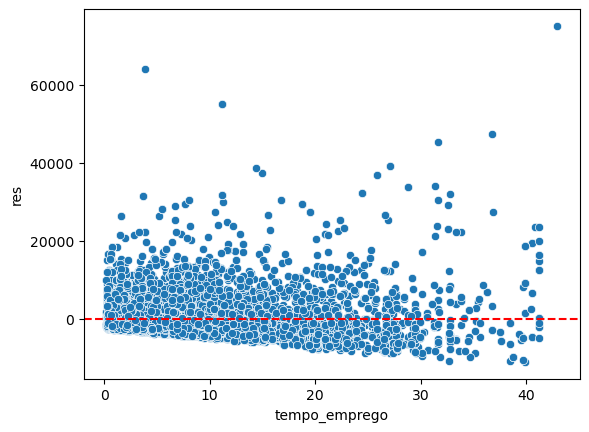

In [248]:
# 2. Análise de resíduos

df['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [232]:
# O gráfico sugere que alguma transformação nas variáveis pode ser útil

In [261]:
reg2 = smf.ols('renda ~ np.log(tempo_emprego)', data = df).fit()
print(reg2.summary())
df['res_log'] = reg2.resid

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          7.66e-236
Time:                        09:40:31   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2612.16

C:\Users\noron\AppData\Local\Temp\ipykernel_17496\3322651858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_log'] = reg2.resid


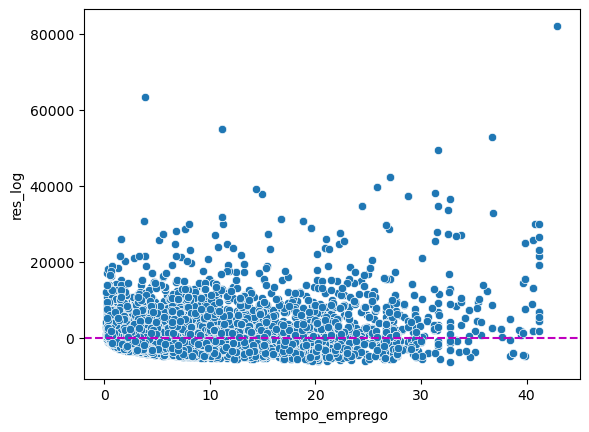

In [262]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_log', data = df)
plt.axhline(y=0, color='m', linestyle='--')

In [263]:
reg3 = smf.ols('np.log(renda) ~ tempo_emprego', data = df).fit()
print(reg3.summary())
df['res_logy'] = reg3.resid

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:40:49   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002

C:\Users\noron\AppData\Local\Temp\ipykernel_17496\3426107182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_logy'] = reg3.resid


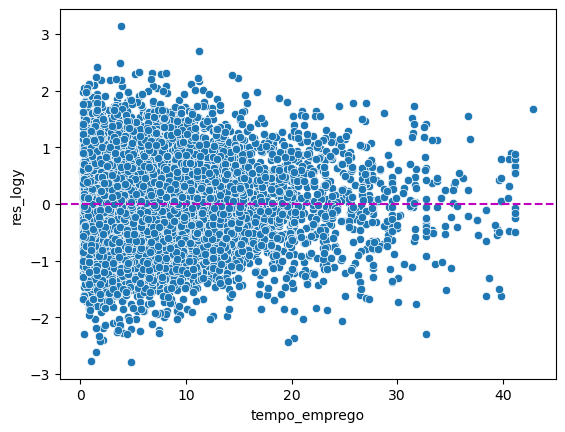

In [264]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_logy', data = df)
plt.axhline(y=0, color='m', linestyle='--')

In [272]:
reg4 = smf.ols('renda ~ (tempo_emprego + np.power(tempo_emprego,2))', data = df).fit() 
print(reg4.summary())
df['res_pol'] = reg4.resid

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:45:10   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

C:\Users\noron\AppData\Local\Temp\ipykernel_17496\4156843607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_pol'] = reg4.resid


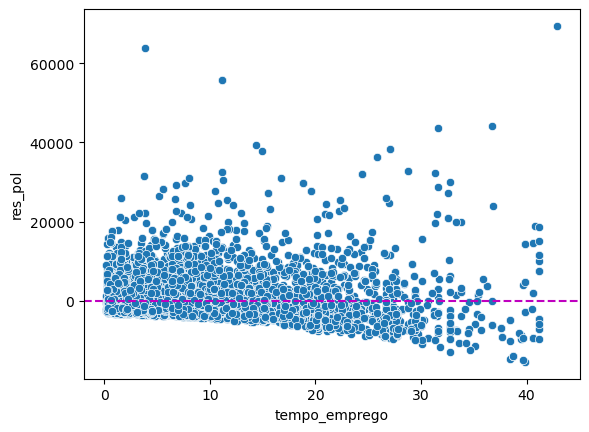

In [273]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_pol', data = df)
plt.axhline(y=0, color='m', linestyle='--')

In [239]:
# 3. Regressão linear múltipla

y, X = patsy.dmatrices('renda ~ tempo_emprego + posse_de_veiculo + qtd_filhos + posse_de_imovel + sexo + idade + tipo_renda + qt_pessoas_residencia + educacao + estado_civil + 1', df)

modelo5 = sm.OLS(y,X).fit()
modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:37:24   Log-Likelihood:            -1.4603e+05
No. Observations:               15000   AIC:                         2.921e+05
Df Residuals:                   14980   BIC:                         2.922e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -2124.8424   1428.825     -1.487      0.137   -4925.515     675.830
posse_de_veiculo[T.True]          -53.8616     75.246     -0.716      0.474    -201.353      93.629
posse_de_imovel[T.True]           398.8962     72.026      5.538      0.000     257.717     540.075
sexo[T.M]                        2339.2556     79.318     29.492      0.000    2183.783    2494.728
tipo_renda[T.Bolsista]           -783.6312   2048.409     -0.383      0.702   -4798.764    3231.502
tipo_renda[T.Empresário]         1023.9903     85.540     11.971      0.000     856.321    1191.660
tipo_renda[T.Pensionista]        1354.2258    136.270      9.938      0.000    1087.121    1621.331
tipo_renda[T.Servidor público]    416.7379    123.665      3.370      0.001     174.339     659.137
educacao[T.Pós graduação]        2718.4540    986.413      2.756      0.006     784.964    4651.944
educacao[T.Secundário]            256.2050    299.454      0.856      0.392    -330.762     843.172
educacao[T.Superior completo]     827.7268    302.582      2.736      0.006     234.630    1420.824
educacao[T.Superior incompleto]   222.1051    342.263      0.649      0.516    -448.772     892.982
estado_civil[T.Separado]          704.5504    709.630      0.993      0.321    -686.412    2095.513
estado_civil[T.Solteiro]          864.5998    695.641      1.243      0.214    -498.942    2228.141
estado_civil[T.União]             -44.1994    127.390     -0.347      0.729    -293.900     205.501
estado_civil[T.Viúvo]             746.9205    714.988      1.045      0.296    -654.543    2148.384
tempo_emprego                     299.9966      5.799     51.731      0.000     288.630     311.364
qtd_filhos                       -773.0012    695.400     -1.112      0.266   -2136.071     590.068
idade                              27.6133      4.325      6.385      0.000      19.136      36.090
qt_pessoas_residencia             822.4520    693.802      1.185      0.236    -537.486    2182.390
==============================================================================
Omnibus:                    12225.649   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           560314.241
Skew:                           3.605   Prob(JB):                         0.00
Kurtosis:                      32.061   Cond. No.                     2.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [274]:
# Removendo alguns parâmetros

y, X = patsy.dmatrices('renda ~ tempo_emprego + posse_de_veiculo + qtd_filhos + posse_de_imovel + idade + sexo + 1', df)

modelo5 = sm.OLS(y,X).fit()
print(modelo5.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     542.6
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:46:38   Log-Likelihood:            -1.2210e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12459   BIC:                         2.443e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

C:\Users\noron\AppData\Local\Temp\ipykernel_17496\1291698361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res5'] = modelo5.resid


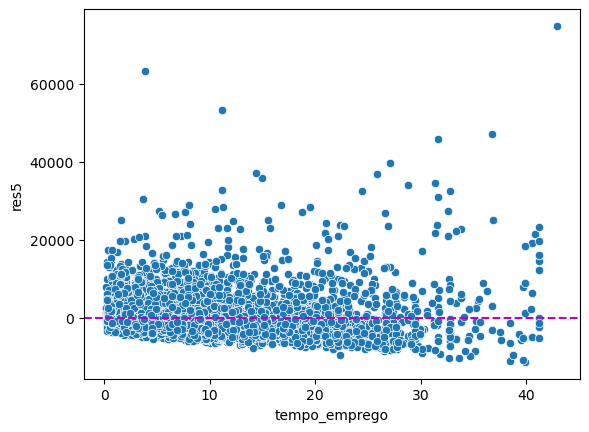

In [257]:
df['res5'] = modelo5.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res5', data = df)
plt.axhline(y=0, color='m', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     542.6
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:56:11   Log-Likelihood:            -1.2210e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12459   BIC:                         2.443e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

C:\Users\noron\AppData\Local\Temp\ipykernel_17496\3758345814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res6'] = modelo6.resid


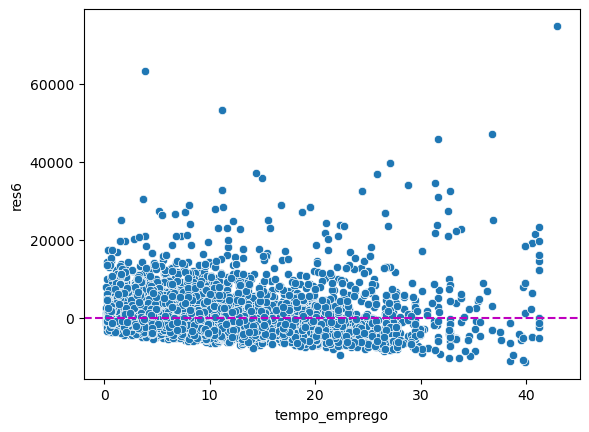

In [282]:
# Testando transformações

y, X = patsy.dmatrices('renda ~ tempo_emprego + posse_de_veiculo + qtd_filhos + posse_de_imovel + idade + sexo + 1', df)

modelo6 = sm.OLS(y,X).fit()
print(modelo5.summary())

df['res6'] = modelo6.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res6', data = df)
plt.axhline(y=0, color='m', linestyle='--')